<a href="https://colab.research.google.com/github/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorials/01_basics/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-nightly-2.0-preview

    100% |████████████████████████████████| 74.3MB 484kB/s 
    100% |████████████████████████████████| 61kB 25.5MB/s 
    100% |████████████████████████████████| 245kB 21.0MB/s 
    100% |████████████████████████████████| 3.2MB 9.3MB/s 
    100% |████████████████████████████████| 61kB 26.6MB/s 
    100% |████████████████████████████████| 112kB 36.4MB/s 


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
L = tf.keras.layers

In [4]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 1e-4

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


# data.shape is (batch_size, data_dimension)
print(x_train.shape)


# convert to tensor
x_train_ = tf.convert_to_tensor(x_train)
y_train_ = tf.convert_to_tensor(y_train)

(15, 1)


In [0]:
# Linear regression model
model = L.Dense(output_size)

# loss function
def loss_fn(model, x, y):
    predict_y = model(x)
    return tf.keras.losses.mean_squared_error(predict_y, y)

# optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

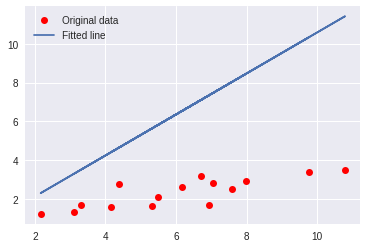

In [6]:
# Plot the graph
predicted = model(x_train_).numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [7]:
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, x_train_, y_train_)
    grads = tape.gradient(loss, model.variables)
    
    
    if (epoch+1) % 5 == 0:
        print("loss: ", tf.reduce_sum(loss).numpy())

    # update prameters using grads
    optimizer.apply_gradients(zip(grads, model.variables))

Instructions for updating:
Colocations handled automatically by placer.
loss:  103.98578
loss:  28.899519
loss:  10.155106
loss:  5.4727836
loss:  4.3001575
loss:  4.0035176
loss:  3.925523
loss:  3.902115
loss:  3.8923464
loss:  3.8859973
loss:  3.8805165
loss:  3.875267


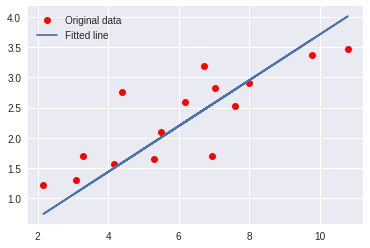

In [8]:
# Plot the graph
predicted = model(x_train_).numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()
